## Tasks — Regression (week 1)

In [1]:
import numpy as np 
import pandas as pd
import urllib
import scipy.optimize
import random
from matplotlib import pyplot as plt
from sklearn import svm

In [59]:
def parseData(fname):
    for l in urllib.urlopen(fname):
        yield eval(l)       
print "Reading data..."
data = list(parseData("http://jmcauley.ucsd.edu/cse190/data/beer/beer_50000.json"))
print "done"
        

Reading data...
done



### 1. What is the distribution of ratings in the dataset (for ‘review/taste’)? That is, how many 1-star, 2-star, 3-star (etc.) reviews are there? You may write out the values or include a simple plot (1 mark).

In [44]:
data1 = [d for d in data if 'review/taste' in d]

def feature(datum):
    feat = datum['review/taste']
    return feat

X = [feature(d) for d in data1]

a = np.arange(0.5,5.5,0.5)
f = []
for x in a:
    f.append(X.count(x))
    
df = pd.DataFrame(f,a)

In [60]:
data1[1000]

{'beer/ABV': 3.5,
 'beer/beerId': '436',
 'beer/brewerId': '163',
 'beer/name': 'Amstel Light',
 'beer/style': 'Light Lager',
 'review/appearance': 2.0,
 'review/aroma': 2.0,
 'review/overall': 1.5,
 'review/palate': 2.0,
 'review/taste': 2.0,
 'review/text': 'The color of chardonnay with about as much head as a glass of wine.\t\tAroma is initially a bitter skunky funk, some grassy straw notes, but if you concentrate you can pick out some bready honey malt lying way beneath.\t\tFlavor is similar to the nose, initially skunky, but some notes of corn and honey malt emerge as it rolls through the mouth.\t\tMouthfeel is slick and watery, but finishes tingly, very crisp. Very low drinkability. I know a lot of people like this as a low calorie lighter import, but there really is not much flavor, and what flavor is there is funky and skunky.',
 'review/timeStruct': {'hour': 23,
  'isdst': 0,
  'mday': 8,
  'min': 17,
  'mon': 3,
  'sec': 29,
  'wday': 6,
  'yday': 67,
  'year': 2009},
 'revie

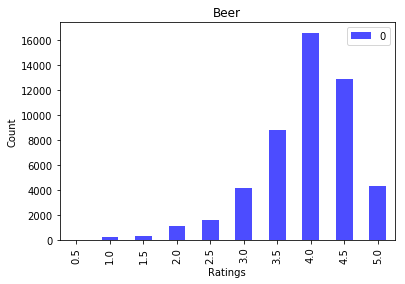

In [45]:
df.plot(kind='bar',color='b',alpha = 0.7)
plt.xlabel('Ratings') # Label X axis
plt.ylabel('Count') #  Label Y axis
plt.title('Beer') # titles
plt.show()

### 2.Train a simple predictor to predict a beer’s ‘taste’ score using two features: 1)beer is a Hefeweizen 2) beer/ABV

In [132]:
data2 = [d for d in data if d.has_key('beer/style')]

def feature(datum):
  feat = [1,datum['beer/ABV']]
  if datum['beer/style'] == 'Hefeweizen':
    feat.append(1)
  else:
    feat.append(0)
  return feat

X = [feature(d) for d in data2]
y = [d['review/taste'] for d in data2]
theta,residuals,rank,s = np.linalg.lstsq(X, y)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


In [133]:
theta

array([ 3.11795084,  0.10877902, -0.05637406])

theta0 = 3.11795084  
the constant attributer

theta1 = 0.10877902
the influence of "ABV" attributer

theta2 = -0.05637406
the influence of attributer that if beer is a Hefeweizen

### 3.Split the data into two equal fractions – the first half for training, the second half for testing (based on the order they appear in the file). Train the same model as above on the training set only. What is the model’s MSE on the training and on the test set (1 mark)?

In [60]:
data3 = data[:25000]
data4 = data[25000:]

#data3 = [d for d in data3 if d.has_key('beer/style')]

def feature(datum):
  feat = [1,(1 if datum['beer/style'] == 'Hefeweizen' else 0) ,  datum['beer/ABV']]
  return feat

X = [feature(d) for d in data3]
y = [d['review/taste'] for d in data3]
theta,residuals,rank,s = np.linalg.lstsq(X, y)
mse1 = residuals/len(y)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


In [61]:
theta = np.matrix(theta).T

data4 = [d for d in data4 if d.has_key('beer/style')]
X = [feature(d) for d in data4]
y = [d['review/taste'] for d in data4]
X = np.matrix(X)
y = np.matrix(y).T

diff = X*theta - y
diffSq = diff.T*diff
mse2 = diffSq / len(y)

In [62]:
##TEST MSE
mse2

matrix([[0.42370652]])

In [63]:
##TRAINING MSE
mse1

array([0.48396806])

### 4.Repeat the above experiment by using a random 50% split of the data (i.e., half for training, half for testing, after first shuffling the data). 

In [70]:
data5 = data
random.shuffle(data5)
data6 = data5[:25000]
data7 = data5[25000:]


In [71]:
#data6 = [d for d in data6 if d.has_key('beer/style')]
#data7 = [d for d in data7 if d.has_key('beer/style')]

def feature(datum):
  feat = [1,(1 if datum['beer/style'] == 'Hefeweizen' else 0) ,  datum['beer/ABV']]
  return feat

X = [feature(d) for d in data6]
y = [d['review/taste'] for d in data6]
theta,residuals,rank,s = np.linalg.lstsq(X, y)
mse3 = residuals/len(y)

theta = np.matrix(theta).T

X = [feature(d) for d in data7]
y = [d['review/taste'] for d in data7]
X = np.matrix(X)
y = np.matrix(y).T
diff = X*theta - y
diffSq = diff.T*diff
mse4 = diffSq / len(y)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


In [72]:
mse3

array([0.44789317])

In [73]:
mse4

matrix([[0.45147536]])

After shuffling the data sequence, mse of training data and testing data are smaller. 

### 5.Modify your experiment from Question 4 to use the features

In [74]:
def feature(datum):
  feat1 = datum['beer/ABV'] if datum['beer/style'] == 'Hefeweizen' else 0
  feat2 = datum['beer/ABV'] if datum['beer/style'] != 'Hefeweizen' else 0
  feat = [1,feat1, feat2]
  return feat

X = [feature(d) for d in data6]
y = [d['review/taste'] for d in data6]
theta,residuals,rank,s = np.linalg.lstsq(X, y)
mse3 = residuals/len(y)

theta = np.matrix(theta).T

X = [feature(d) for d in data7]
y = [d['review/taste'] for d in data7]
X = np.matrix(X)
y = np.matrix(y).T
diff = X*theta - y
diffSq = diff.T*diff
mse4 = diffSq / len(y)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


In [75]:
mse3

array([0.44788606])

In [76]:
mse4

matrix([[0.45147021]])

### 6.The model from Question 5 uses the same two features as the model from Question 4 and has the same dimensionality. Comment on why the two models might perform differently (1 mark).


Although the dimensionality for two models are same, but the input value are different. For the model of question 2-4, the feature looks like [1,ABV,1/0]. But for the model of question 5, the feature looks like [1,5.0,1] for the beer is Hefeweizen, and [1,0,5.0] for the beer is not the Hefeweizen for example. Plus, those two are all random shuffle dataset, as the result, the two models would perform differently.

## Tasks — Classification (week 2):

### 7.First, let’s train a predictor that estimates whether a beer is a ‘Hefeweizen’ using five features describing its rating:
[‘review/taste’, ‘review/appearance’, ‘review/aroma’, ‘review/palate’, ‘review/overall’].

In [4]:
def feature(datum):
    feat = [datum['review/taste'],datum['review/appearance'],datum['review/aroma'],datum['review/palate'],datum['review/overall']]
    return feat

X = [feature(d) for d in data5]
y = ["Hefeweizen" in b['beer/style'] for b in data5]

In [5]:
y[:10]

[False, False, False, False, False, False, False, False, False, False]

In [6]:
X_train = X[:25000]
y_train = y[:25000]

X_test = X[25000:]
y_test = y[25000:]

In [7]:
clf = svm.SVC(C=1000, kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
train_predictions[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [9]:
train_correct = train_predictions == y_train
test_correct = test_predictions == y_test

In [21]:
train_acc = float(sum(train_correct))/float(len(train_correct))
test_acc = float(sum(test_correct))/float(len(test_correct))

In [25]:
train_acc

0.98824

In [26]:
test_acc 

0.98704

### 8.Considering same prediction problem as above, can you come up with a more accurate predictor (e.g. using features from the text, or otherwise)? Write down the feature vector you design, and report its train/test accuracy (1 mark).

In [32]:
data8 = [d for d in data6 if "Hefeweizen" in d['beer/style']]

In [33]:
data8[1]

{'beer/ABV': 4.9,
 'beer/beerId': '1621',
 'beer/brewerId': '394',
 'beer/name': "Stoudt's Weizen",
 'beer/style': 'Hefeweizen',
 'review/appearance': 4.0,
 'review/aroma': 3.5,
 'review/overall': 4.0,
 'review/palate': 3.5,
 'review/taste': 4.0,
 'review/text': 'Sweet wheat smell.  Cloudy white/yellow look with a creamy white head.  It lasts (the retention) for a while but not forever.  The taste is of yeast and clove.  Clean fresh finish.. not as mouth as I anticipated by its appearence.  The brew is a solid wheat selection for summer drinking.  You are also left with a thick malt coating of the tongue and throat which also has a banana clove as well.  Worth a try if you are a "wheat head" if not get the tripel instead.. trust me...',
 'review/timeStruct': {'hour': 19,
  'isdst': 0,
  'mday': 16,
  'min': 24,
  'mon': 7,
  'sec': 30,
  'wday': 1,
  'yday': 197,
  'year': 2002},
 'review/timeUnix': 1026847470,
 'user/profileName': 'frank4sail'}

In [36]:
def feature(datum):
    feat = [datum['review/taste'],datum['review/appearance'],datum['review/aroma'],datum['review/palate'],datum['review/overall']]
    if "Hefeweizen" in d['beer/name']:
        feat.append(1)
    else:
        feat.append(0)
    return feat

X = [feature(d) for d in data5]
y = ["Hefeweizen" in b['beer/style'] for b in data5]

In [37]:
X_train = X[:25000]
y_train = y[:25000]

X_test = X[25000:]
y_test = y[25000:]

In [38]:
clf = svm.SVC(C=1000, kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
train_predictions[:10]

train_correct = train_predictions == y_train
test_correct = test_predictions == y_test

In [40]:
train_acc = float(sum(train_correct))/float(len(train_correct))
test_acc = float(sum(test_correct))/float(len(test_correct))

In [41]:
train_acc

0.99224

In [42]:
test_acc 

0.99144